# Analyzing world happiness data set

We are going to use the CRIS-DM
1. Business understanding
1. Data undestanding
1. Data Preparation
1. Modeling
1. Evaluation
1. Deployment

we are going to go through only the first 3 steps in this notebook, so lets get started 

## Business Understanding

Our objectieve for this notebbok will be to find answers to these questions
1. Which country has highest happiness score ?
1. Which country has the worst happiness score ?
1. Which countries happiness score has increased the most in recent years ?
1. Which countries happiness score has fallen the most in recent years ?
1. Which factors influence happiness the most ?

And success is finding answers to all of these questions 

# Data undestanding 
We are going to look into the [world happiness](https://www.kaggle.com/unsdsn/world-happiness) data set.
The data set has 5 csv files, namingly 2015, 2016, 2017, 2018 & 2019. Each file contains repote for that year

So lets have a look into the data, and get an idea of what data has been provided

In [1]:
# importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data & taking a look at it

In [2]:
fifteen_df = pd.read_csv('data/2015.csv')
fifteen_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
fifteen_df.isnull().mean()

Country                          0.0
Region                           0.0
Happiness Rank                   0.0
Happiness Score                  0.0
Standard Error                   0.0
Economy (GDP per Capita)         0.0
Family                           0.0
Health (Life Expectancy)         0.0
Freedom                          0.0
Trust (Government Corruption)    0.0
Generosity                       0.0
Dystopia Residual                0.0
dtype: float64

In [4]:
sixteen_df = pd.read_csv('data/2016.csv')
sixteen_df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [5]:
sixteen_df.isnull().mean()

Country                          0.0
Region                           0.0
Happiness Rank                   0.0
Happiness Score                  0.0
Lower Confidence Interval        0.0
Upper Confidence Interval        0.0
Economy (GDP per Capita)         0.0
Family                           0.0
Health (Life Expectancy)         0.0
Freedom                          0.0
Trust (Government Corruption)    0.0
Generosity                       0.0
Dystopia Residual                0.0
dtype: float64

In [6]:
seventeen_df = pd.read_csv('data/2017.csv')
seventeen_df

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [7]:
seventeen_df.isnull().mean()

Country                          0.0
Happiness.Rank                   0.0
Happiness.Score                  0.0
Whisker.high                     0.0
Whisker.low                      0.0
Economy..GDP.per.Capita.         0.0
Family                           0.0
Health..Life.Expectancy.         0.0
Freedom                          0.0
Generosity                       0.0
Trust..Government.Corruption.    0.0
Dystopia.Residual                0.0
dtype: float64

In [8]:
eightteen_df = pd.read_csv('data/2018.csv')
eightteen_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [9]:
eightteen_df.isnull().mean()

Overall rank                    0.00000
Country or region               0.00000
Score                           0.00000
GDP per capita                  0.00000
Social support                  0.00000
Healthy life expectancy         0.00000
Freedom to make life choices    0.00000
Generosity                      0.00000
Perceptions of corruption       0.00641
dtype: float64

In [10]:
nineteen_df = pd.read_csv('data/2019.csv')
nineteen_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [11]:
nineteen_df.isnull().mean()

Overall rank                    0.0
Country or region               0.0
Score                           0.0
GDP per capita                  0.0
Social support                  0.0
Healthy life expectancy         0.0
Freedom to make life choices    0.0
Generosity                      0.0
Perceptions of corruption       0.0
dtype: float64

So as we have seen we have seen not all files have the same column names and we also have some missing values

# Data Preparation
As we have seen that not all files have same column names, and some also have missing values

So here we are going to deal with these problems

### Imputing values
As we have seen in the data understanding part that only 2018 file has some missing values, lets impute them

Here we are going to use ffill to impute these values, we can also use mean, median or the mode for this process.

We are using ffill because, if we assume that Score depends on Perceptions of corruption, so Perceptions of corruption should depend on Score hence we are first goin to sort the data frame using Score and then impute using ffill so the entries with similar Score get similar values

In [12]:
eightteen_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [13]:
eightteen_df.isnull().mean()

Overall rank                    0.00000
Country or region               0.00000
Score                           0.00000
GDP per capita                  0.00000
Social support                  0.00000
Healthy life expectancy         0.00000
Freedom to make life choices    0.00000
Generosity                      0.00000
Perceptions of corruption       0.00641
dtype: float64

In [14]:
eightteen_df = eightteen_df.sort_values('Score')
eightteen_df['Perceptions of corruption'] = eightteen_df['Perceptions of corruption']. \
                                                fillna(method='ffill')
eightteen_df.isnull().mean()

Overall rank                    0.0
Country or region               0.0
Score                           0.0
GDP per capita                  0.0
Social support                  0.0
Healthy life expectancy         0.0
Freedom to make life choices    0.0
Generosity                      0.0
Perceptions of corruption       0.0
dtype: float64

### Cleaning the data
Now as we know we don't have all data frames having same column name, so lets rename them to standard names(we choose these names)

In [15]:
def clean_df(df, score_col_name):
    '''
    This function renames columns, to a standard name
        then takes the columns required for analysis and creates a new dataframe
        and returns the new dataframe
    
    INPUT:-
        df: A dataframe containing columns to be extracted and renamed
        score_col_name: The name to be give to Happiness Score columns
    OUTPUT:-
        df: A new dataframe containing required data with standard column names
    '''
    new_df = df.rename(columns = {
        'Happiness Score': score_col_name,
        'Happiness.Score': score_col_name,
        'Score': score_col_name,
        'Happiness.Rank': 'Happiness Rank',
        'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
        'Trust..Government.Corruption.': 'Trust (Government Corruption)',
        'Country or region': 'Country',
        'Overall rank': 'Happiness Rank',
        'GDP per capita': 'Economy (GDP per Capita)',
        'Social support': 'Family',
        'Freedom to make life choices': 'Freedom',
        'Perceptions of corruption': 'Trust (Government Corruption)'
    })
    new_df = new_df[['Country', 'Happiness Rank', score_col_name,
       'Economy (GDP per Capita)', 'Family', 'Freedom',
       'Trust (Government Corruption)', 'Generosity']].copy()
    return new_df

In [16]:
def create_barplot(x, y, df):
    '''
    This function draws a barplot from df(given dataframe) using x, y
    INPUT:-
        x: A string, it is the name of column used for barplot x axis
        y: A string, it is the name of column used for barplot y axis
        df: This is the data frame containing the data to be ploted
    OUTPUT:
        None
    '''
    plt.figure(figsize=(25,5))
    plt.xticks(rotation=45)
    sns.barplot(x=x , y=y, data=df);

In [17]:
df_1 = clean_df(fifteen_df, '2015 Happiness Score')
df_2 = clean_df(sixteen_df, '2016 Happiness Score')
df_3 = clean_df(seventeen_df, '2017 Happiness Score')
df_4 = clean_df(eightteen_df, '2018 Happiness Score')
df_5 = clean_df(nineteen_df, '2019 Happiness Score')

In [18]:
df = df_1[['Country', '2015 Happiness Score']].merge(
    df_2[['Country', '2016 Happiness Score']], how='inner', on='Country').merge(\
        df_3[['Country', '2017 Happiness Score']], how='inner', on='Country').merge(\
            df_4[['Country', '2018 Happiness Score']], how='inner', on='Country').merge(\
                df_5[['Country', '2019 Happiness Score']], how='inner', on='Country')

df.insert(6,'Diff',df['2019 Happiness Score']-df['2015 Happiness Score'])
df = df.sort_values([
    '2019 Happiness Score', 
    '2018 Happiness Score', 
    '2017 Happiness Score', 
    '2016 Happiness Score', 
    '2015 Happiness Score'
], ascending=False)
df

,Country,2015 Happiness Score,2016 Happiness Score,2017 Happiness Score,2018 Happiness Score,2019 Happiness Score,Diff
5,Finland,7.406,7.413,7.469,7.632,7.769,0.363
2,Denmark,7.527,7.526,7.522,7.555,7.600,0.073
3,Norway,7.522,7.498,7.537,7.594,7.554,0.032
1,Iceland,7.561,7.501,7.504,7.495,7.494,-0.067
6,Netherlands,7.378,7.339,7.377,7.441,7.488,0.110
...,...,...,...,...,...,...,...
116,Malawi,4.292,4.156,3.970,3.587,3.410,-0.882
121,Yemen,4.077,3.724,3.593,3.355,3.380,-0.697
136,Rwanda,3.465,3.515,3.471,3.408,3.334,-0.131
129,Tanzania,3.781,3.666,3.349,3.303,3.231,-0.550


# Searching ansswers to our Questions
Now lets begin by looking for answers to our questions 

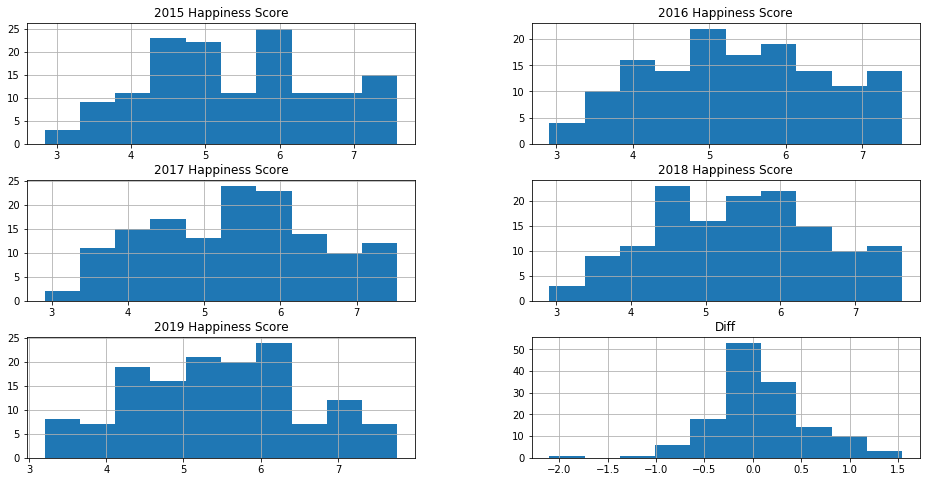

In [19]:
df.hist(figsize=(16, 8));

# Which country has highest happiness score ?

,Country,2015 Happiness Score,2016 Happiness Score,2017 Happiness Score,2018 Happiness Score,2019 Happiness Score,Diff
5,Finland,7.406,7.413,7.469,7.632,7.769,0.363
2,Denmark,7.527,7.526,7.522,7.555,7.600,0.073
3,Norway,7.522,7.498,7.537,7.594,7.554,0.032
1,Iceland,7.561,7.501,7.504,7.495,7.494,-0.067
6,Netherlands,7.378,7.339,7.377,7.441,7.488,0.110
0,Switzerland,7.587,7.509,7.494,7.487,7.480,-0.107
7,Sweden,7.364,7.291,7.284,7.314,7.343,-0.021
8,New Zealand,7.286,7.334,7.314,7.324,7.307,0.021
4,Canada,7.427,7.404,7.316,7.328,7.278,-0.149
12,Austria,7.200,7.119,7.006,7.139,7.246,0.046


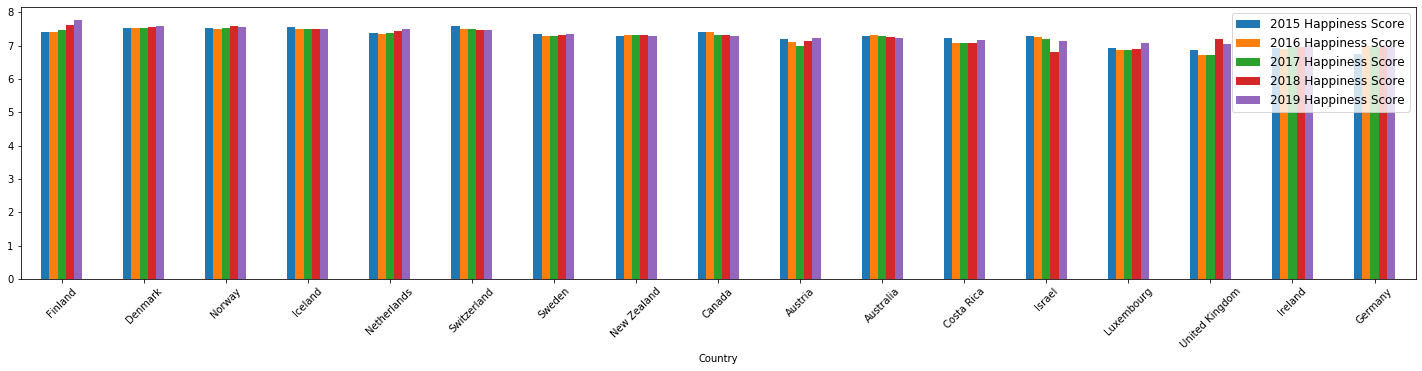

In [20]:
df.set_index('Country').drop('Diff', axis=1)[:17].plot.bar(figsize=(25, 5)).legend(fontsize=12);
plt.xticks(rotation=45);
df[:17]

Finland & Denmark seems to be having the highest happiness score here but
## What if we take an average from 2015 to 2019 ?

,Country,Score
5,Finland,6.342000
2,Denmark,6.300500
3,Norway,6.289500
1,Iceland,6.248000
0,Switzerland,6.241667
6,Netherlands,6.188833
4,Canada,6.100667
8,New Zealand,6.097667
7,Sweden,6.095833
9,Australia,6.054167


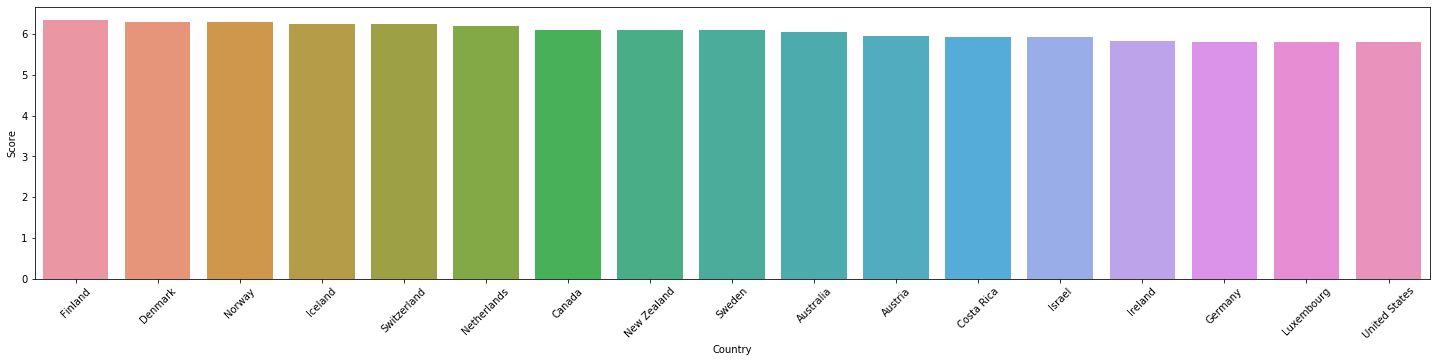

In [21]:
mean_inc_df = pd.DataFrame()
mean_inc_df['Country'] = df['Country']
mean_inc_df['Score'] = df.mean(axis=1)
mean_inc_df = mean_inc_df.sort_values(['Score'], ascending=False)
create_barplot('Country', 'Score', mean_inc_df[:17])
mean_inc_df[:17]

And still we have Finland & Denmark at the top, people over here seem to be really happy

# Which country has the worst happiness score ?

,2015 Happiness Score,2016 Happiness Score,2017 Happiness Score,2018 Happiness Score,2019 Happiness Score
Country,,,,,
Afghanistan,3.575,3.360,3.794,3.632,3.203
Tanzania,3.781,3.666,3.349,3.303,3.231
Rwanda,3.465,3.515,3.471,3.408,3.334
Yemen,4.077,3.724,3.593,3.355,3.380
Malawi,4.292,4.156,3.970,3.587,3.410
Syria,3.006,3.069,3.462,3.462,3.462
Botswana,4.332,3.974,3.766,3.590,3.488
Haiti,4.518,4.028,3.603,3.582,3.597
Zimbabwe,4.610,4.193,3.875,3.692,3.663


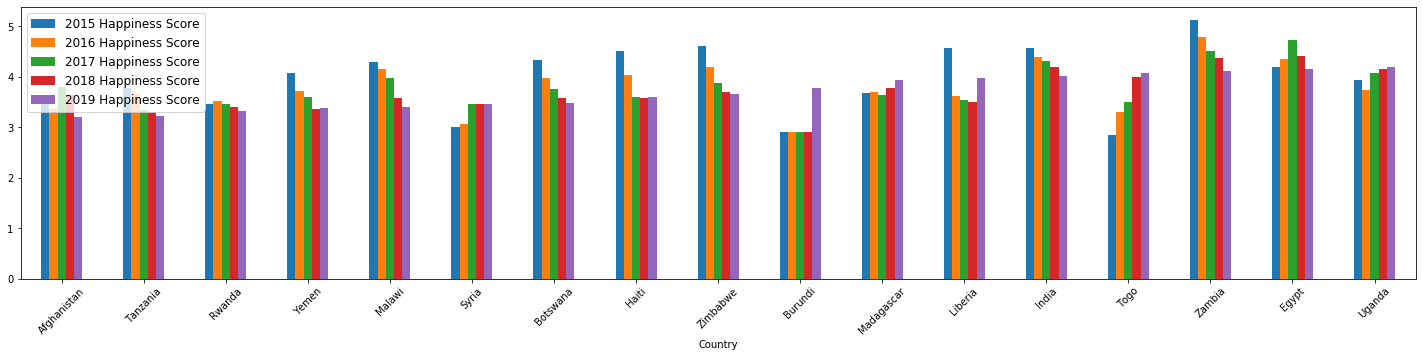

In [22]:
_df = df.set_index('Country').drop('Diff', axis=1).sort_values([
    '2019 Happiness Score', 
    '2018 Happiness Score', 
    '2017 Happiness Score', 
    '2016 Happiness Score', 
    '2015 Happiness Score'
], ascending=True)

_df[:17].plot.bar(figsize=(25, 5)).legend(fontsize=12);
plt.xticks(rotation=45);
_df[:17]

Afghanistan & Tanzania seems to be having the lowest happiness score here but
## What if we take an average from 2015 to 2019 ?

,Country,Score
139,Burundi,2.710833
129,Tanzania,2.796667
138,Syria,2.819500
136,Rwanda,2.843667
135,Afghanistan,2.865333
121,Yemen,2.905333
113,Botswana,3.051000
105,Haiti,3.067833
116,Malawi,3.088833
103,Liberia,3.100000


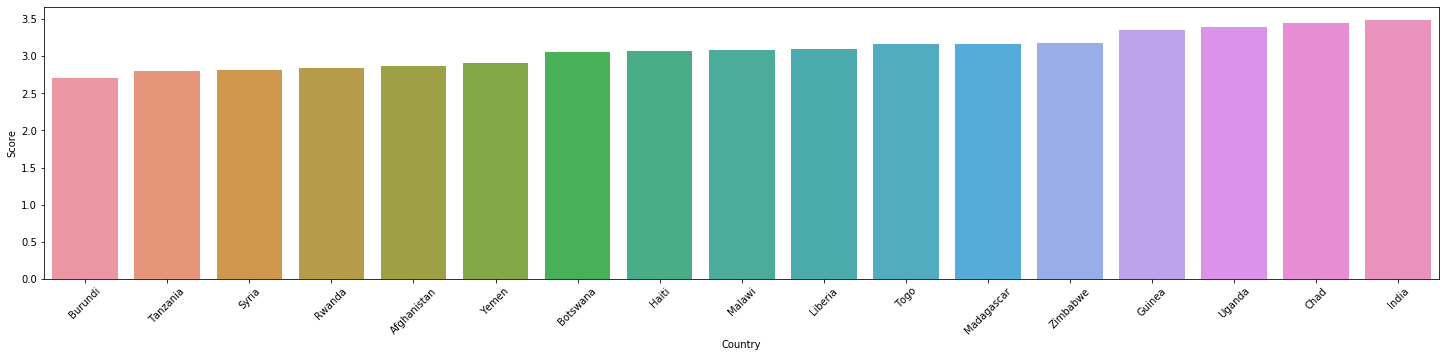

In [23]:
mean_dec_df = pd.DataFrame()
mean_dec_df['Country'] = df['Country']
mean_dec_df['Score'] = df.mean(axis=1)
mean_dec_df = mean_dec_df.sort_values(['Score'])
create_barplot('Country', 'Score', mean_dec_df[:17])
mean_dec_df[:17]

By looking at the average it seems like Burundi & Tanzania have the lowest happiness score

# Which countries happiness score has increased the most in recent years ?

,Diff,Country
137,1.543,Benin
133,1.289,Ivory Coast
140,1.246,Togo
92,1.072,Honduras
134,1.000,Burkina Faso
91,0.958,Hungary
79,0.946,Romania
126,0.903,Gabon
128,0.881,Cambodia
132,0.878,Guinea


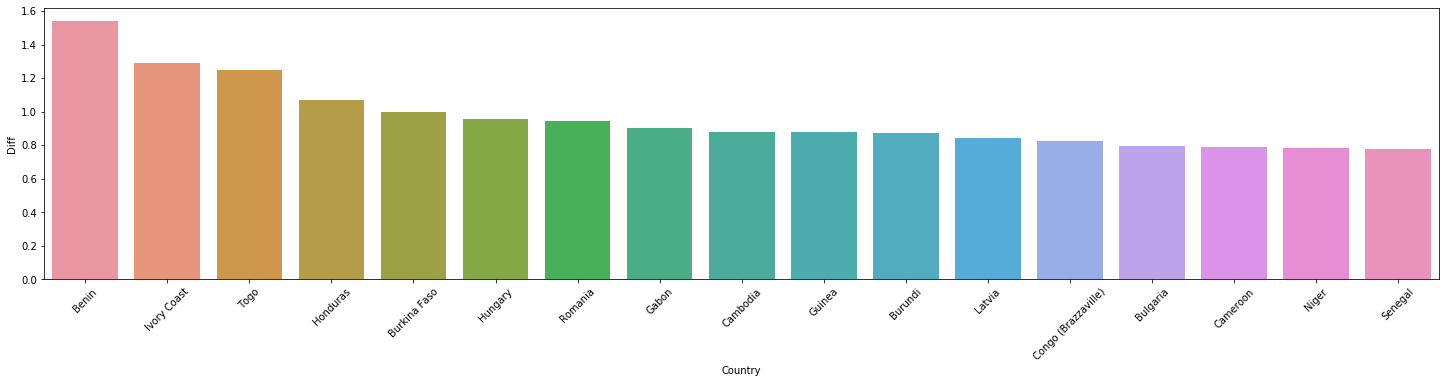

In [24]:
diff_df = df[['Diff']].copy()
diff_df['Country'] = df['Country']
diff_df = diff_df.sort_values(['Diff'], ascending=False)
create_barplot('Country', 'Diff', diff_df[:17])
diff_df.head(17)

By looking at the data we can see that Benin & Ivory Coast seem to have increased their happiness score the most also Togo has a very good increase in their happiness score

# Which countries happiness score has fallen the most in recent years ?

,Diff,Country
21,-2.103,Venezuela
78,-1.022,Zambia
102,-0.947,Zimbabwe
105,-0.921,Haiti
116,-0.882,Malawi
113,-0.844,Botswana
121,-0.697,Yemen
15,-0.683,Brazil
103,-0.596,Liberia
13,-0.592,Mexico


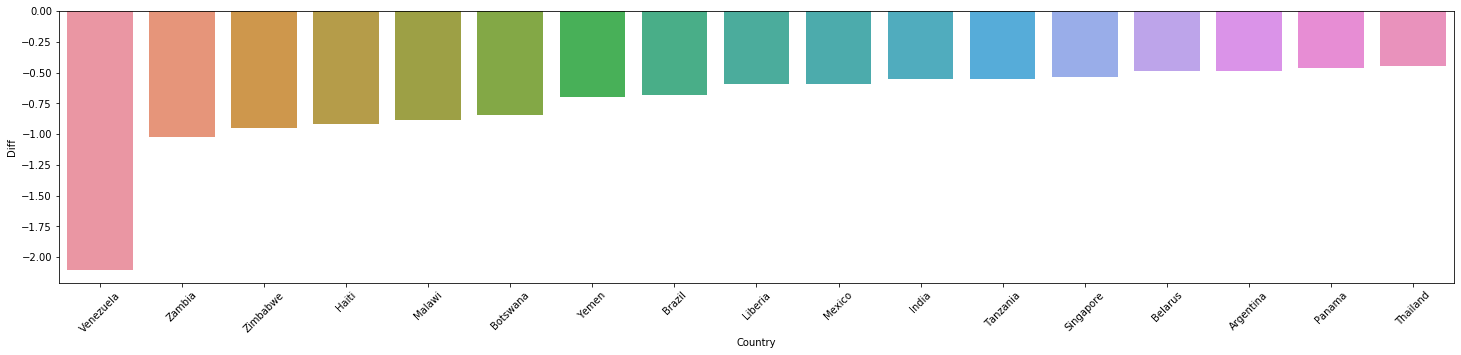

In [25]:
diff_df = diff_df.sort_values(['Diff'], ascending=True)
create_barplot('Country', 'Diff', diff_df[:17])
diff_df.head(17)

By looking at the data  we can see that Venezuela has greatly reduced its happiness score, and by a huge margin. Zambia, Zimbabwe & Haiti have also performed quiet bad in recent years

# Which factors influence happiness the most ? 

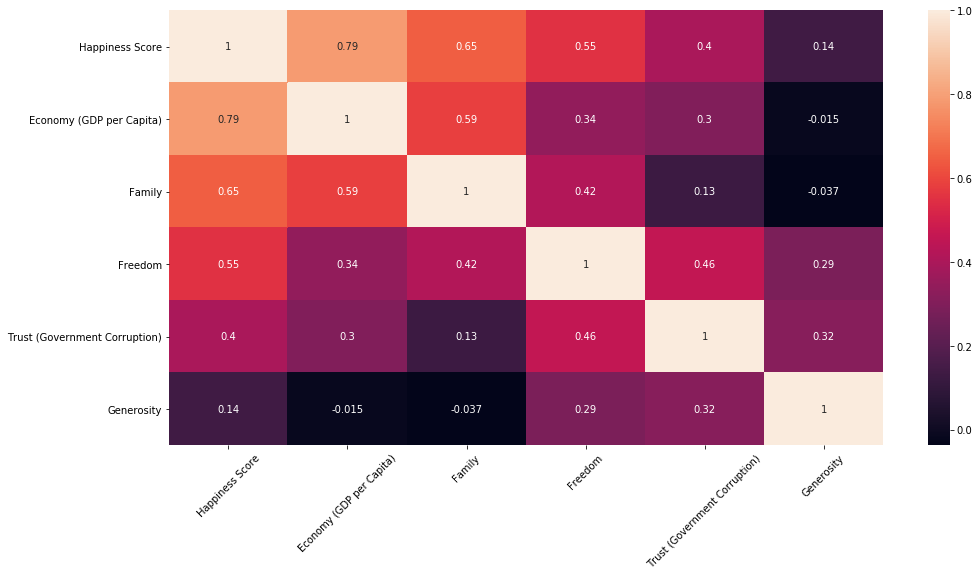

In [26]:
df_all = pd.concat([
    df_1.rename(columns = {'2015 Happiness Score': 'Happiness Score'}), 
    df_2.rename(columns = {'2016 Happiness Score': 'Happiness Score'}),
    df_3.rename(columns = {'2017 Happiness Score': 'Happiness Score'}),
    df_4.rename(columns = {'2018 Happiness Score': 'Happiness Score'}),
    df_5.rename(columns = {'2019 Happiness Score': 'Happiness Score'}),
])
plt.figure(figsize = (16,8))
plt.xticks(rotation=45)
sns.heatmap(df_all.drop('Happiness Rank', axis=1).corr(), annot=True);

As we can see in the heat map above Happiness Score depends quite a lot on GDP per  capital, and that too by a huge margin, then comes Family & Freedom, and to my surprise Generosity docent come in the top 3

We can also find some more interesting things here like family and GDP per Capita actually reduce generosity, we can also derive more from the heatmap but for now I am going to leave it to that 

# Conclusion
1. Which country has highest happiness score ?
    * The answer is Finland
1. Which country has the worst happiness score ?
    * The answer actually depends if we say in 2019 then it is Afghanistan
    * But on an average from 2015 to 2019 it is actually Burundi
1. Which countries happiness score has increased the most in recent years ?
    * This title goes to Benin
1. Which countries happiness score has fallen the most in recent years ?
    * The country whose happiness score has fallen the most from 2015 to 2019 is Venezuela 
1. Which factors influence happiness the most ?
    * GDP per capita, Family & Freedom influence happiness score the most in that order